In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split

In [29]:
data = pd.read_csv('manzanas.csv')

# Task 1

In [30]:
print(data['ID'].count())
df = pd.DataFrame(data)
df['Acidez'] = pd.to_numeric(df['Acidez'], errors='coerce')
print(type(df['Acidez'][0]))
columnas_numericas = df.drop(columns=['ID']).select_dtypes(include=['float64']).columns
rango_por_columna = df[columnas_numericas].max() - df[columnas_numericas].min()
print("Rango de variables numéricas:")
for columna, rango in zip(rango_por_columna.index, rango_por_columna):
    print(f"{columna}: {rango}")

4000
<class 'numpy.float64'>
Rango de variables numéricas:
Tamaño: 13.558069958
Peso: 12.940561265
Dulzura: 13.269401007
Textura: 13.674909606
Humedad: 13.326299912
Madurez: 13.102435602
Acidez: 14.415274712999999


**1.1 Resumen del conjunto de datos:**

- **Número de filas:** 4000
- **Número de columnas:** 9
- **Variables cualitativas/categóricas:** "Calidad" (categórica)
- **Variables cuantitativas continuas:** "Tamaño", "Peso", "Dulzura", "Textura", "Humedad", "Madurez", "Acidez" (numéricas)
- **Rango de valores:**
  - **Tamaño:** 13.56 (aproximadamente)
  - **Peso:** 12.94 (aproximadamente)
  - **Dulzura:** 13.27 (aproximadamente)
  - **Textura:** 13.67 (aproximadamente)
  - **Humedad:** 13.33 (aproximadamente)
  - **Madurez:** 13.10 (aproximadamente)
  - **Acidez:** 14.42 (aproximadamente)

**1.2 Tipos de variables:**

- **Cualitativa/categórica:** "Calidad" es la única variable cualitativa/categórica en el conjunto de datos. Representa la calidad del producto y toma valores "buena" o "mala".

- **Cuantitativa continua:** "Tamaño", "Peso", "Dulzura", "Textura", "Humedad", "Madurez", "Acidez" son variables cuantitativas continuas. Estas variables tienen valores numéricos y pueden tener una gama infinita de valores dentro de un rango.


**1.3 Gráficos exploratorios:**

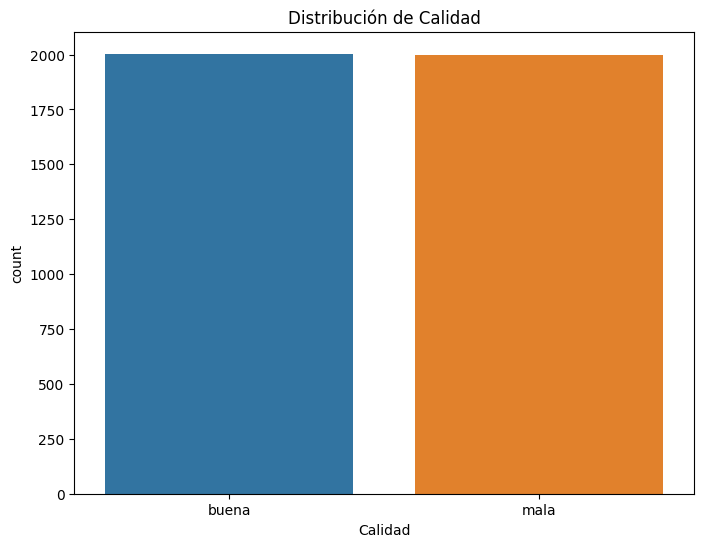

In [31]:
for columna in df.select_dtypes(include='object').columns:
    plt.figure(figsize=(8, 6))
    sns.countplot(x=columna, data=df)
    plt.title(f'Distribución de {columna}')
    plt.show()

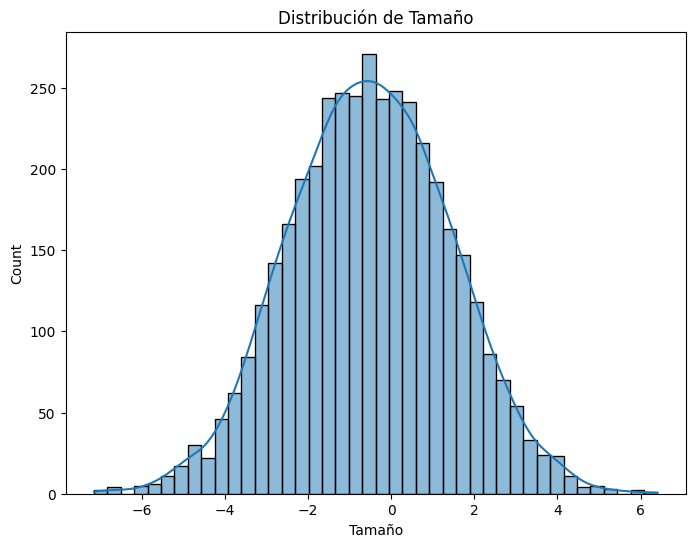

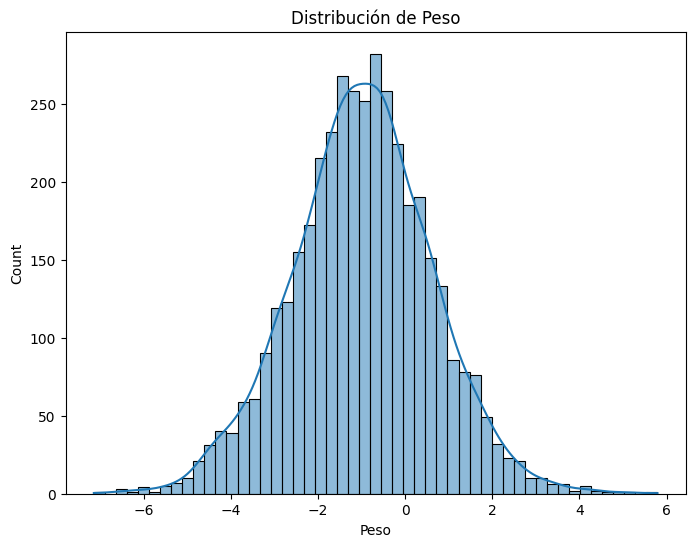

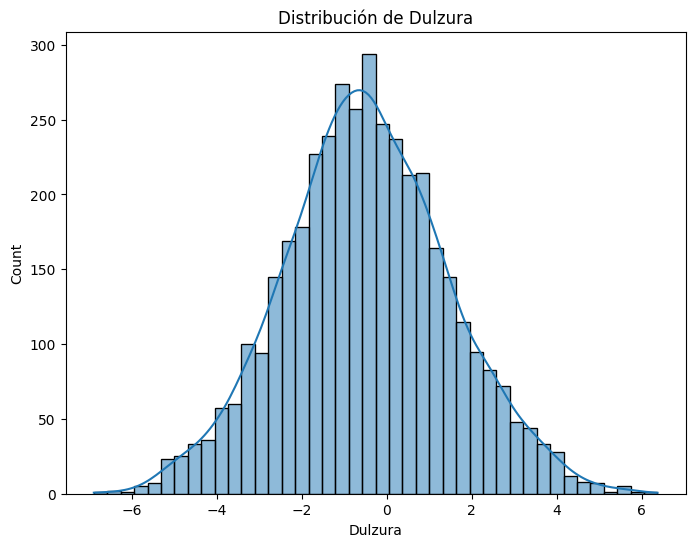

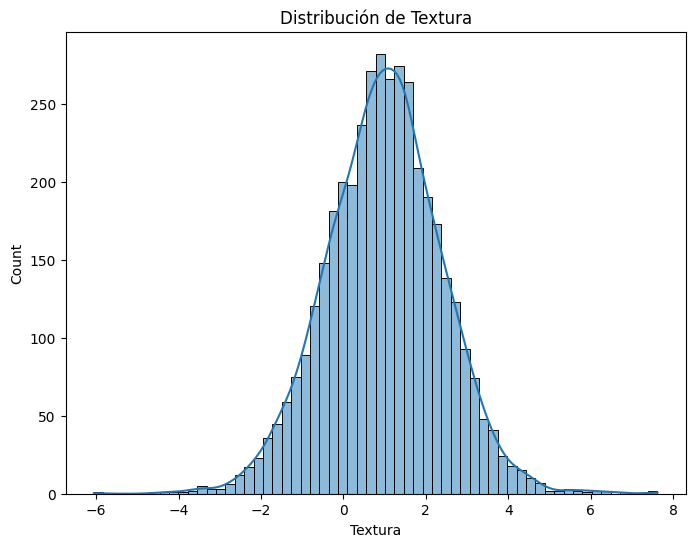

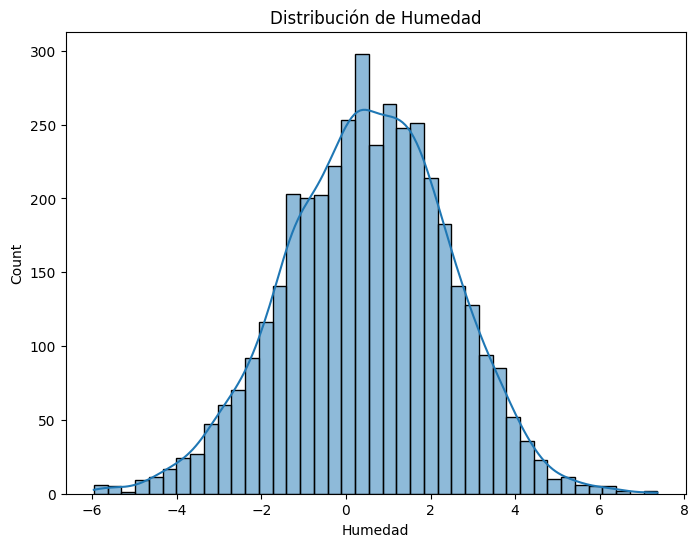

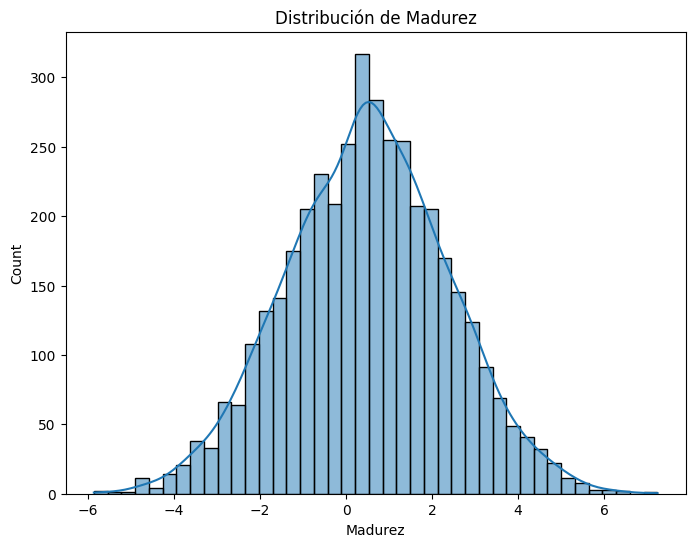

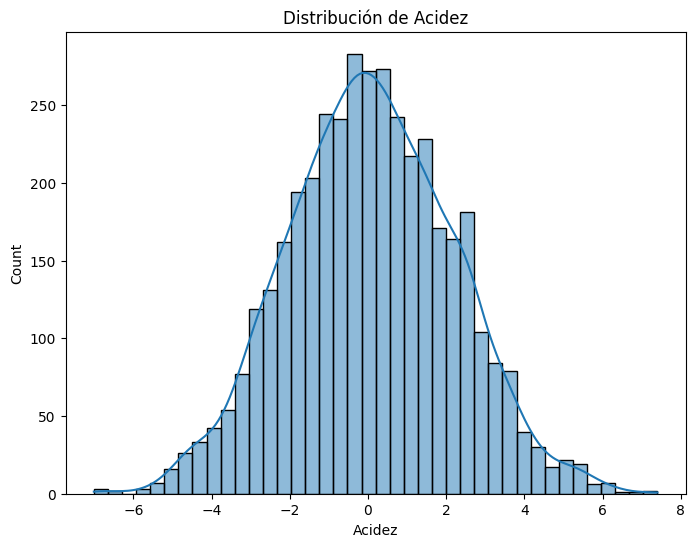

In [32]:
for columna in df.drop(columns=['ID']).select_dtypes(include=['float64']).columns:
    plt.figure(figsize=(8, 6))
    sns.histplot(df[columna], kde=True)
    plt.title(f'Distribución de {columna}')
    plt.show()

In [38]:
df = df.dropna()
df['Calidad'] = df['Calidad'].map({'buena': 1, 'mala': 0})
variables_numericas = df.drop(columns=['ID', 'Calidad']).select_dtypes(include=['float64'])
variable_categorica = df['Calidad']

# Calcular la correlación entre cada variable numérica y la variable categórica
correlaciones = variables_numericas.corrwith(variable_categorica)

# Imprimir las correlaciones
print("Correlación entre cada variable numérica y la Calidad:")
for variable, correlacion in zip(correlaciones.index, correlaciones):
    print(f"{variable}: {correlacion}")

Correlación entre cada variable numérica y la Calidad:
Tamaño: 0.24400717867851393
Peso: 0.0014209332584549743
Dulzura: 0.250998458836519
Textura: -0.012376198047427452
Humedad: 0.26022254529522354
Madurez: -0.2643148792459574
Acidez: -0.0076972998267602925


**1.5 proporción variables categóricas**

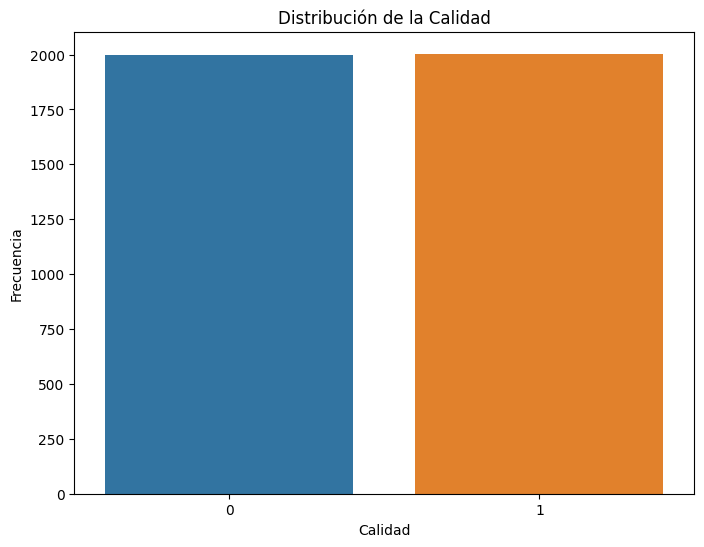

Tabla de Frecuencia:
1    2004
0    1996
Name: Calidad, dtype: int64

Proporciones:
1    0.501
0    0.499
Name: Calidad, dtype: float64


In [39]:
# Tabla de frecuencia de la variable categórica 'Calidad'
tabla_frecuencia = df['Calidad'].value_counts()

# Proporciones
proporciones = df['Calidad'].value_counts(normalize=True)

# Gráfico de barras para la variable categórica 'Calidad'
plt.figure(figsize=(8, 6))
sns.countplot(x='Calidad', data=df)
plt.title('Distribución de la Calidad')
plt.xlabel('Calidad')
plt.ylabel('Frecuencia')
plt.show()

# Imprimir resultados
print("Tabla de Frecuencia:")
print(tabla_frecuencia)
print("\nProporciones:")
print(proporciones)

**1.6 limpieza de variables**

No se realizará una limpieza de variables y se continuará con las variables brindadas en el laboratorio. La decisión de retener todas las variables se fundamenta en las correlaciones moderadas observadas entre las variables numéricas y la variable objetivo 'Calidad', sugiriendo que cada variable puede aportar información valiosa para predecir la calidad de las manzanas. Además, la distribución balanceada de la variable 'Calidad' y la ausencia de evidencia clara de variables redundantes respaldan la idea de que cada aspecto medido por las variables puede contribuir de manera única al modelo.

# Task 2

In [40]:
X = df.drop(columns=['Calidad'])
y = df['Calidad']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


## Regresión lineal simple

No será implementada. La razón principal para no usar la regresión simple es que esta técnica se enfoca en analizar la relación entre una sola variable y la calidad de las manzanas, sin tener en cuenta las otras características que también podrían influir en la calidad. Como la calidad de las manzanas puede depender de varios factores que interactúan entre sí, la regresión simple no sería suficiente para capturar esta complejidad y proporcionar predicciones precisas sobre la calidad.

## Regresión lineal multiple

In [49]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

modelo_regresion = LinearRegression()
# Entrenar el modelo con el conjunto de entrenamiento
modelo_regresion.fit(X_train, y_train)
# Realizar predicciones en el conjunto de prueba
y_pred = modelo_regresion.predict(X_test)
# Evaluar el rendimiento del modelo
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Imprimir métricas de evaluación
print("Error cuadrático medio (MSE):", mse)
print("R2 Score:", r2)
# Coeficientes y término independiente del modelo
print("Coeficientes:", modelo_regresion.coef_)
print("Término independiente:", modelo_regresion.intercept_)

Error cuadrático medio (MSE): 0.17686738883146244
R2 Score: 0.29252602296179353
Coeficientes: [ 7.95455016e-06  1.10839728e-01  4.48725216e-02  1.01185855e-01
  5.85062035e-03  7.71586373e-02 -2.06672976e-02 -5.54406233e-02]
Término independiente: 0.6008179794276157


## Regresión polinomial

In [50]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

grado_polinomio = 5

# Crear el modelo de regresión polinómica
modelo_polinomial = make_pipeline(PolynomialFeatures(grado_polinomio), LinearRegression())
# Entrenar el modelo con el conjunto de entrenamiento
modelo_polinomial.fit(X_train, y_train)
# Realizar predicciones en el conjunto de prueba
y_pred_polinomial = modelo_polinomial.predict(X_test)
# Evaluar el rendimiento del modelo
mse_polinomial = mean_squared_error(y_test, y_pred_polinomial)
r2_polinomial = r2_score(y_test, y_pred_polinomial)
# Imprimir métricas de evaluación
print("Error cuadrático medio (MSE) - Polinomial:", mse_polinomial)
print("R2 Score - Polinomial:", r2_polinomial)

Error cuadrático medio (MSE) - Polinomial: 0.20372625871387548
R2 Score - Polinomial: 0.18508987195619753


## SVR

In [51]:
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
scaler_X = StandardScaler()
scaler_y = StandardScaler()

X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled = scaler_X.transform(X_test)
y_train_scaled = scaler_y.fit_transform(y_train.values.reshape(-1, 1)).ravel()

# Crear el modelo SVR
modelo_svr = SVR(kernel='linear', C=1.0)
# Entrenar el modelo con el conjunto de entrenamiento
modelo_svr.fit(X_train_scaled, y_train_scaled)
# Realizar predicciones en el conjunto de prueba
y_pred_svr_scaled = modelo_svr.predict(X_test_scaled)
# Desescalar las predicciones para obtener resultados en la escala original
y_pred_svr_scaled = y_pred_svr_scaled.reshape(-1, 1) 
y_pred_svr = scaler_y.inverse_transform(y_pred_svr_scaled)
# Evaluar el rendimiento del modelo
mse_svr = mean_squared_error(y_test, y_pred_svr)
r2_svr = r2_score(y_test, y_pred_svr)
# Imprimir métricas de evaluación
print("Error cuadrático medio (MSE) - SVR:", mse_svr)
print("R2 Score - SVR:", r2_svr)

Error cuadrático medio (MSE) - SVR: 0.18593085040763668
R2 Score - SVR: 0.25627195006914094


## Regresión arbol de decisión

In [57]:
from sklearn.tree import DecisionTreeRegressor

# Crear el modelo de Regresión de Árbol de Decisión
modelo_arbol_decision = DecisionTreeRegressor(random_state=1)
# Entrenar el modelo con el conjunto de entrenamiento
modelo_arbol_decision.fit(X_train, y_train)
# Realizar predicciones en el conjunto de prueba
y_pred_arbol_decision = modelo_arbol_decision.predict(X_test)
# Evaluar el rendimiento del modelo
mse_arbol_decision = mean_squared_error(y_test, y_pred_arbol_decision)
r2_arbol_decision = r2_score(y_test, y_pred_arbol_decision)
# Imprimir métricas de evaluación
print("Error cuadrático medio (MSE) - Árbol de Decisión:", mse_arbol_decision)
print("R2 Score - Árbol de Decisión:", r2_arbol_decision)

Error cuadrático medio (MSE) - Árbol de Decisión: 0.19375
R2 Score - Árbol de Decisión: 0.2249951562197262


## Regresión Random Forest

In [58]:
from sklearn.ensemble import RandomForestRegressor

# Crear el modelo de Regresión con Random Forest
modelo_random_forest = RandomForestRegressor(random_state=1)
# Entrenar el modelo con el conjunto de entrenamiento
modelo_random_forest.fit(X_train, y_train)
# Realizar predicciones en el conjunto de prueba
y_pred_random_forest = modelo_random_forest.predict(X_test)
# Evaluar el rendimiento del modelo
mse_random_forest = mean_squared_error(y_test, y_pred_random_forest)
r2_random_forest = r2_score(y_test, y_pred_random_forest)
# Imprimir métricas de evaluación
print("Error cuadrático medio (MSE) - Random Forest:", mse_random_forest)
print("R2 Score - Random Forest:", r2_random_forest)

Error cuadrático medio (MSE) - Random Forest: 0.08558975
R2 Score - Random Forest: 0.6576388602428764


## Regresión Logística

In [59]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Crear el modelo de Regresión Logística
modelo_logistico = LogisticRegression(random_state=1)
# Entrenar el modelo con el conjunto de entrenamiento
modelo_logistico.fit(X_train_scaled, y_train)
# Realizar predicciones en el conjunto de prueba
y_pred_logistico = modelo_logistico.predict(X_test_scaled)
# Evaluar el rendimiento del modelo
accuracy_logistico = accuracy_score(y_test, y_pred_logistico)
# Imprimir métricas de evaluación
print("Exactitud - Regresión Logística:", accuracy_logistico)
print("Informe de Clasificación - Regresión Logística:")
print(classification_report(y_test, y_pred_logistico))

Exactitud - Regresión Logística: 0.75375
Informe de Clasificación - Regresión Logística:
              precision    recall  f1-score   support

           0       0.76      0.75      0.75       401
           1       0.75      0.75      0.75       399

    accuracy                           0.75       800
   macro avg       0.75      0.75      0.75       800
weighted avg       0.75      0.75      0.75       800



## KNN

In [93]:
from sklearn.neighbors import KNeighborsClassifier

# Escalar las características para KNN 
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
# Crear el modelo KNN 
modelo_knn = KNeighborsClassifier(n_neighbors=7)
# Entrenar el modelo con el conjunto de entrenamiento escalado
modelo_knn.fit(X_train_scaled, y_train)
# Realizar predicciones en el conjunto de prueba
y_pred_knn = modelo_knn.predict(X_test_scaled)
# Evaluar el rendimiento del modelo
accuracy_knn = accuracy_score(y_test, y_pred_knn)
# Imprimir métricas de evaluación
print("Exactitud - K Vecinos Más Cercanos (KNN):", accuracy_knn)
print("Informe de Clasificación - KNN:")
print(classification_report(y_test, y_pred_knn))

Exactitud - K Vecinos Más Cercanos (KNN): 0.89125
Informe de Clasificación - KNN:
              precision    recall  f1-score   support

           0       0.89      0.90      0.89       401
           1       0.90      0.88      0.89       399

    accuracy                           0.89       800
   macro avg       0.89      0.89      0.89       800
weighted avg       0.89      0.89      0.89       800



## SVM

In [61]:
from sklearn.svm import SVC

# Escalar las características para SVM 
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
# Crear el modelo SVM 
modelo_svm = SVC(kernel='linear', C=1.0)
# Entrenar el modelo con el conjunto de entrenamiento escalado
modelo_svm.fit(X_train_scaled, y_train)
# Realizar predicciones en el conjunto de prueba
y_pred_svm = modelo_svm.predict(X_test_scaled)
# Evaluar el rendimiento del modelo
accuracy_svm = accuracy_score(y_test, y_pred_svm)
# Imprimir métricas de evaluación
print("Exactitud - Máquinas de Soporte Vectorial (SVM):", accuracy_svm)
print("Informe de Clasificación - SVM:")
print(classification_report(y_test, y_pred_svm))

Exactitud - Máquinas de Soporte Vectorial (SVM): 0.7575
Informe de Clasificación - SVM:
              precision    recall  f1-score   support

           0       0.76      0.75      0.76       401
           1       0.75      0.77      0.76       399

    accuracy                           0.76       800
   macro avg       0.76      0.76      0.76       800
weighted avg       0.76      0.76      0.76       800



## SVM Kernel

SVM Kernel

In [79]:
# Escalar las características para SVM con kernel 
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
# Crear el modelo SVM con kernel 
modelo_svm_kernel = SVC(kernel='rbf', C=5.0, gamma=0.5)
# Entrenar el modelo con el conjunto de entrenamiento escalado
modelo_svm_kernel.fit(X_train_scaled, y_train)
# Realizar predicciones en el conjunto de prueba
y_pred_svm_kernel = modelo_svm_kernel.predict(X_test_scaled)
# Evaluar el rendimiento del modelo
accuracy_svm_kernel = accuracy_score(y_test, y_pred_svm_kernel)
# Imprimir métricas de evaluación
print("Exactitud - SVM con Kernel:", accuracy_svm_kernel)
print("Informe de Clasificación - SVM con Kernel rbf:")
print(classification_report(y_test, y_pred_svm_kernel))

Exactitud - SVM con Kernel: 0.9225
Informe de Clasificación - SVM con Kernel rbf:
              precision    recall  f1-score   support

           0       0.92      0.93      0.92       401
           1       0.93      0.92      0.92       399

    accuracy                           0.92       800
   macro avg       0.92      0.92      0.92       800
weighted avg       0.92      0.92      0.92       800



### SVM Poly

In [81]:
# Escalar las características para SVM con kernel
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
# Crear el modelo SVM con kernel 
modelo_svm_kernel = SVC(kernel='poly', C=4.0, gamma=0.5)
# Entrenar el modelo con el conjunto de entrenamiento escalado
modelo_svm_kernel.fit(X_train_scaled, y_train)
# Realizar predicciones en el conjunto de prueba
y_pred_svm_kernel = modelo_svm_kernel.predict(X_test_scaled)
# Evaluar el rendimiento del modelo
accuracy_svm_kernel = accuracy_score(y_test, y_pred_svm_kernel)
# Imprimir métricas de evaluación
print("Exactitud - SVM con Kernel:", accuracy_svm_kernel)
print("Informe de Clasificación - SVM con Kernel poly:")
print(classification_report(y_test, y_pred_svm_kernel))

Exactitud - SVM con Kernel: 0.84
Informe de Clasificación - SVM con Kernel poly:
              precision    recall  f1-score   support

           0       0.80      0.91      0.85       401
           1       0.89      0.77      0.83       399

    accuracy                           0.84       800
   macro avg       0.85      0.84      0.84       800
weighted avg       0.85      0.84      0.84       800



## Naive Bayes

In [85]:
from sklearn.naive_bayes import GaussianNB

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
# Crear el modelo Naive Bayes
modelo_naive_bayes = GaussianNB()
# Entrenar el modelo con el conjunto de entrenamiento
modelo_naive_bayes.fit(X_train_scaled, y_train)
# Realizar predicciones en el conjunto de prueba
y_pred_naive_bayes = modelo_naive_bayes.predict(X_test_scaled)
# Evaluar el rendimiento del modelo
accuracy_naive_bayes = accuracy_score(y_test, y_pred_naive_bayes)
# Imprimir métricas de evaluación
print("Exactitud - Naive Bayes:", accuracy_naive_bayes)
print("Informe de Clasificación - Naive Bayes:")
print(classification_report(y_test, y_pred_naive_bayes))

Exactitud - Naive Bayes: 0.765
Informe de Clasificación - Naive Bayes:
              precision    recall  f1-score   support

           0       0.76      0.78      0.77       401
           1       0.77      0.75      0.76       399

    accuracy                           0.77       800
   macro avg       0.77      0.76      0.76       800
weighted avg       0.77      0.77      0.76       800



## Clasificación Arbol de decisión

In [94]:
from sklearn.tree import DecisionTreeClassifier

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
# Crear el modelo Árbol de Decisión 
modelo_arbol_decision = DecisionTreeClassifier(random_state=1)
# Entrenar el modelo con el conjunto de entrenamiento
modelo_arbol_decision.fit(X_train_scaled, y_train)
# Realizar predicciones en el conjunto de prueba
y_pred_arbol_decision = modelo_arbol_decision.predict(X_test_scaled)
# Evaluar el rendimiento del modelo
accuracy_arbol_decision = accuracy_score(y_test, y_pred_arbol_decision)
# Imprimir métricas de evaluación
print("Exactitud - Árbol de Decisión:", accuracy_arbol_decision)
print("Informe de Clasificación - Árbol de Decisión:")
print(classification_report(y_test, y_pred_arbol_decision))

Exactitud - Árbol de Decisión: 0.80625
Informe de Clasificación - Árbol de Decisión:
              precision    recall  f1-score   support

           0       0.80      0.82      0.81       401
           1       0.82      0.79      0.80       399

    accuracy                           0.81       800
   macro avg       0.81      0.81      0.81       800
weighted avg       0.81      0.81      0.81       800



## Clasificación Random Forest 

In [95]:
from sklearn.ensemble import RandomForestClassifier

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
# Crear el modelo Random Forest 
modelo_random_forest = RandomForestClassifier(random_state=1)
# Entrenar el modelo con el conjunto de entrenamiento
modelo_random_forest.fit(X_train_scaled, y_train)
# Realizar predicciones en el conjunto de prueba
y_pred_random_forest = modelo_random_forest.predict(X_test_scaled)
# Evaluar el rendimiento del modelo
accuracy_random_forest = accuracy_score(y_test, y_pred_random_forest)
# Imprimir métricas de evaluación
print("Exactitud - Random Forest:", accuracy_random_forest)
print("Informe de Clasificación - Random Forest:")
print(classification_report(y_test, y_pred_random_forest))

Exactitud - Random Forest: 0.8975
Informe de Clasificación - Random Forest:
              precision    recall  f1-score   support

           0       0.91      0.89      0.90       401
           1       0.89      0.91      0.90       399

    accuracy                           0.90       800
   macro avg       0.90      0.90      0.90       800
weighted avg       0.90      0.90      0.90       800



## **Conclusiones**

**Modelos de Regresión:**
-   **Regresión Lineal Simple y Múltiple:** Estos modelos buscan una relación lineal entre las variables independientes y la calidad de las manzanas. Es posible que estos modelos no hayan capturado bien la complejidad de los datos.
-   **Regresión Polinomial:** Proporciona una forma de modelar una relación no lineal entre las variables independientes y la variable dependiente. Aunque permite capturar mejor la no linealidad, puede ser propenso al sobreajuste.
-   **SVR (Support Vector Regression):** Busca el hiperplano que mejor se ajuste a los datos en un espacio de mayor dimensión, potencialmente ofreciendo un buen equilibrio entre complejidad del modelo y capacidad de generalización.
-   **Regresión Árbol de Decisión y Random Forest:** Modelos basados en árboles que son capaces de capturar relaciones no lineales y complejas entre las variables. Random Forest, al ser un ensamblaje de árboles, mejora la robustez y la precisión.


**Modelos de Clasificación:**

-   **Regresión Logística, KNN (K-Nearest Neighbors), SVM (Support Vector Machine), SVM con Kernel, incluyendo SVM Polinomial, Naive Bayes, Clasificación Árbol de Decisión y Clasificación Random Forest:** Estos modelos están diseñados específicamente para tareas de clasificación, como predecir si la calidad de una manzana es buena o mala. La capacidad de estos modelos para manejar directamente tareas de clasificación, junto con técnicas para manejar la no linealidad (como en SVM con kernel RBF), probablemente contribuyó a su mejor rendimiento en comparación con los modelos de regresión.

**Resultados Destacados:**

-   El modelo SVM con kernel RBF fue el mejor, con un acierto del 0.92 utilizando un parámetro de regularización C=5 y un gamma=0.5. Este alto nivel de precisión sugiere que el modelo fue capaz de capturar eficazmente la complejidad y las no linealidades de los datos, ofreciendo una distinción clara entre manzanas de buena y mala calidad.


En resumen, los modelos de clasificación, especialmente el SVM con kernel RBF, superaron a los modelos de regresión en esta tarea específica debido a su mejor capacidad para manejar los datos binarios del resultado (buena vs mala calidad) y su eficacia en capturar relaciones complejas entre las características.